In [1]:
!pip uninstall scikit-learn --yes

Found existing installation: scikit-learn 1.3.0
Uninstalling scikit-learn-1.3.0:
  Successfully uninstalled scikit-learn-1.3.0


In [2]:
!pip uninstall imblearn --yes

Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0


In [3]:
!pip install scikit-learn==1.2.2

  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/db/98/169b46a84b48f92df2b5e163fce75d471f4df933f8b3d925a61133210776/scikit_learn-1.2.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB 682.7 kB/s eta 0:00:13
   ---------------------------------------- 0.0/8.3 MB 495.5 kB/s eta 0:00:17
   ---------------------------------------- 0.1/8.3 MB 660.6 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.3 MB 660.6 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.3 MB 660.6 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.3 MB 660.6 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.3 MB 660.6 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.3 MB 660.6 kB/s eta 0:00:13
    --------------------------------------- 0.2/8.3 MB 454.0 kB/s eta 0:00:18
    

In [4]:
!pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from imblearn.over_sampling import RandomOverSampler

# Loading Dataset

In [7]:
# importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv")

# Descriptive analysis

In [8]:
# printing first 5 rows of the dataset
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [9]:
# checking dimensions of the dataset
df.shape

(32560, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
# statistical summary of the dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
# checking for the null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

The dataset doesn't have any null values.

In [13]:
# checking how many question mark '(?)' inside the dataset
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

This dataset contains missing values in the form of '?' which needs to be preprocessed.

In [14]:
# checking the counts of label categories
income = df['Income'].value_counts(normalize=True)
print(income)

Income
 <=50K    0.759183
 >50K     0.240817
Name: proportion, dtype: float64


The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.

# Exploratory Data Analysis

### Univariate Analysis

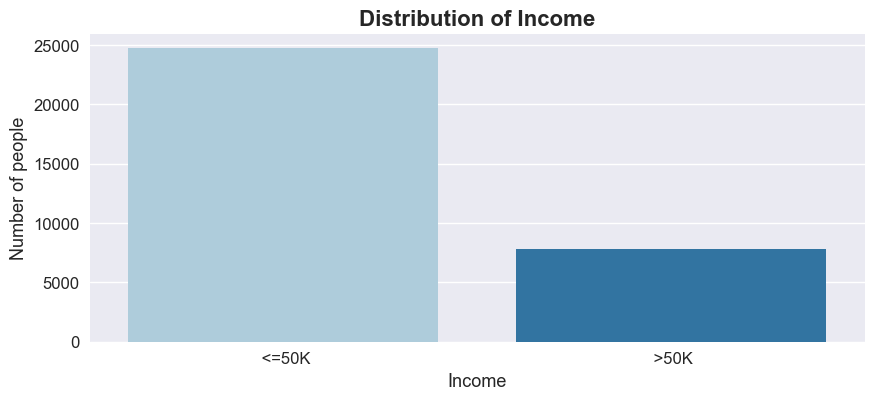

In [15]:
# Creating a barplot for 'Income'
income = df['Income'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10,4))
sns.barplot(x=income.index, y=income.values, palette='Paired')
plt.title('Distribution of Income', fontdict={'fontsize':16, 'fontweight': 'bold'})
plt.xlabel('Income', fontsize=13)
plt.ylabel('Number of people', fontsize=13)
plt.tick_params(labelsize=12)
plt.show()

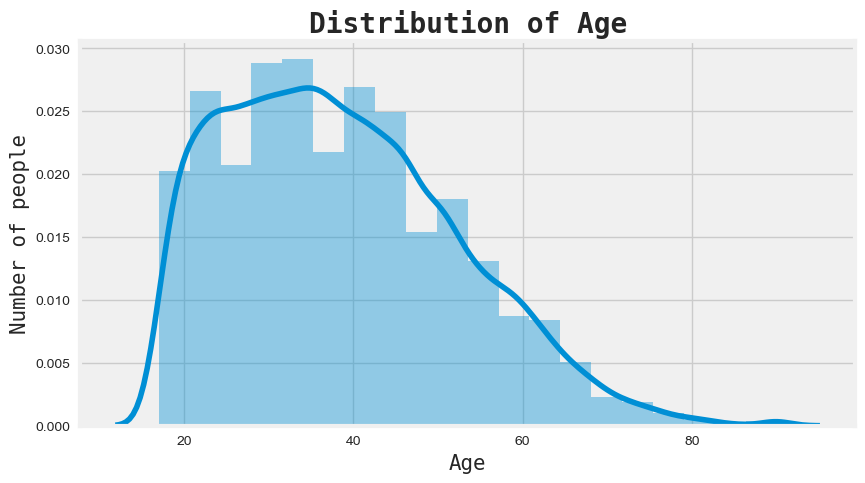

In [16]:
# Creating a distribution plot for 'Age'
age = df['Age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df['Age'], bins=20)
plt.title('Distribution of Age', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

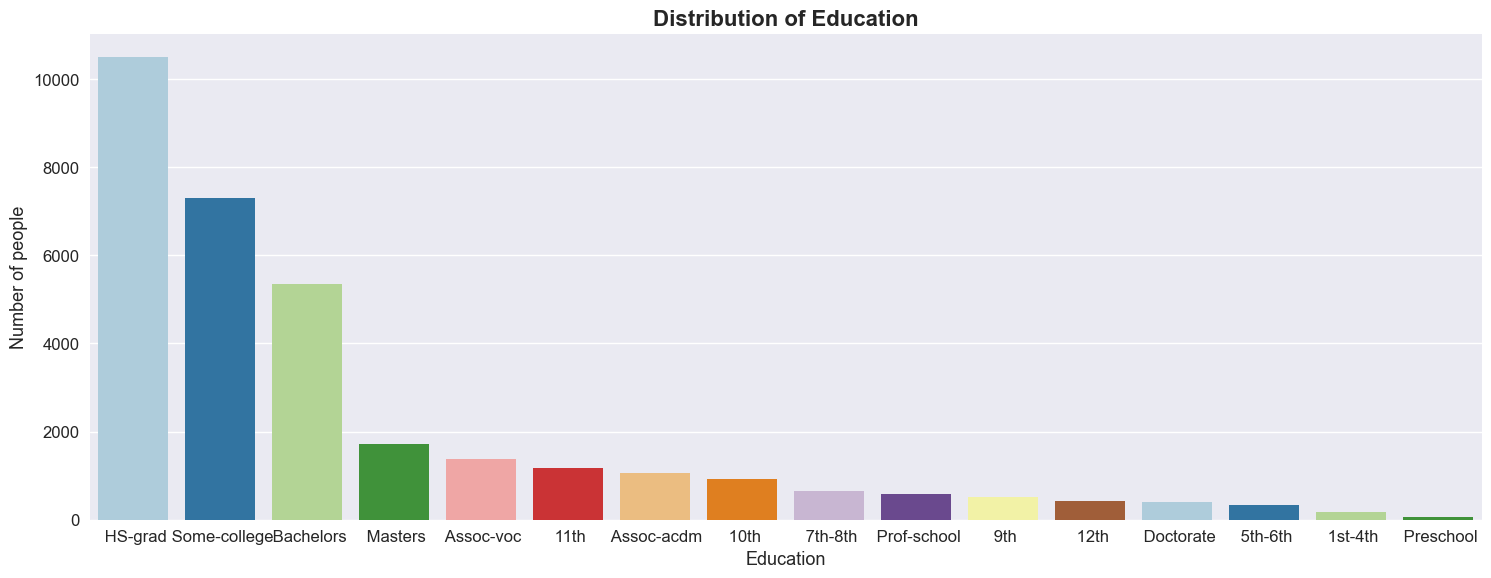

In [17]:
# Creating a barplot for 'Education'
edu = df['Education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(16,6))
sns.barplot(x=edu.index, y=edu.values, palette='Paired')
plt.title('Distribution of Education', fontdict={'fontsize':16, 'fontweight': 'bold'})
plt.xlabel('Education', fontsize=13)
plt.ylabel('Number of people', fontsize=13)
plt.tick_params(labelsize=12)
plt.show()

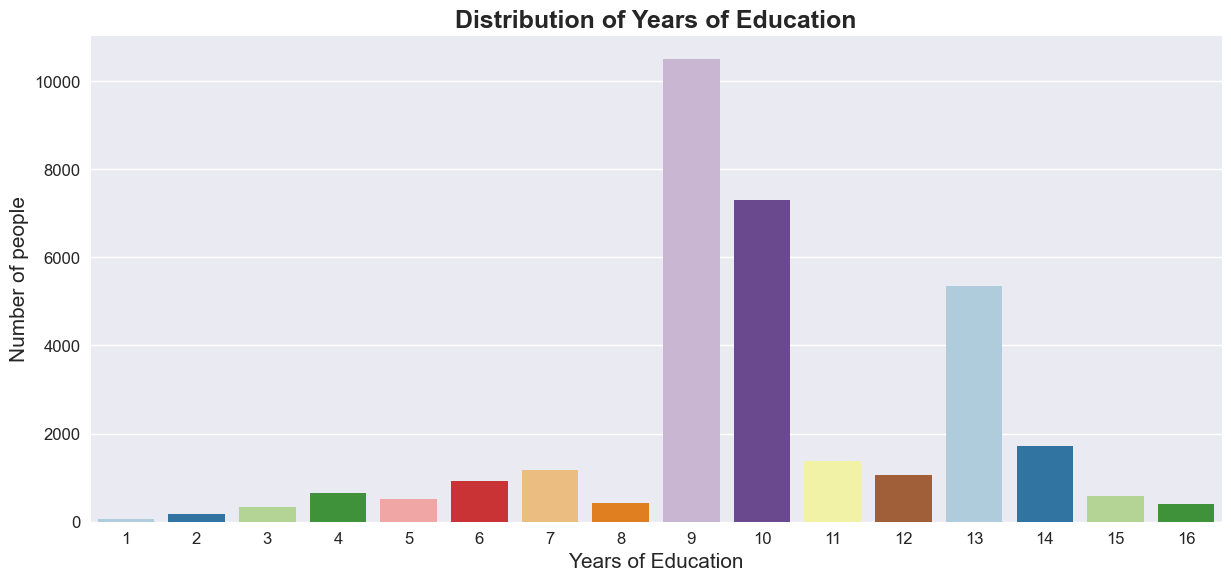

In [18]:
# Creating a barplot for 'Years of Education'
edu_num = df['Education_num'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(13,6))
sns.barplot(x=edu_num.index, y=edu_num.values, palette='Paired')
plt.title('Distribution of Years of Education', fontdict={'fontsize':18, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontsize=15)
plt.ylabel('Number of people', fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

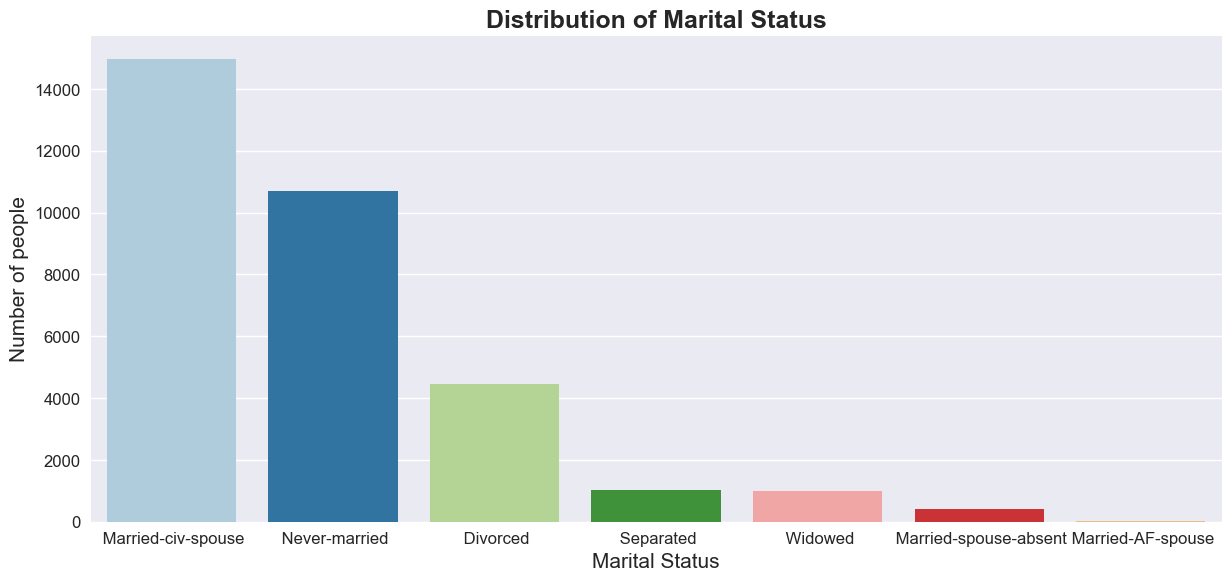

In [19]:
# Creating a barplot for 'Marital_status'
marital_status = df['Marital_status'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(13,6))
sns.barplot(x=marital_status.index, y=marital_status.values, palette='Paired')
plt.title('Distribution of Marital Status', fontdict={'fontsize':18, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Number of people', fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

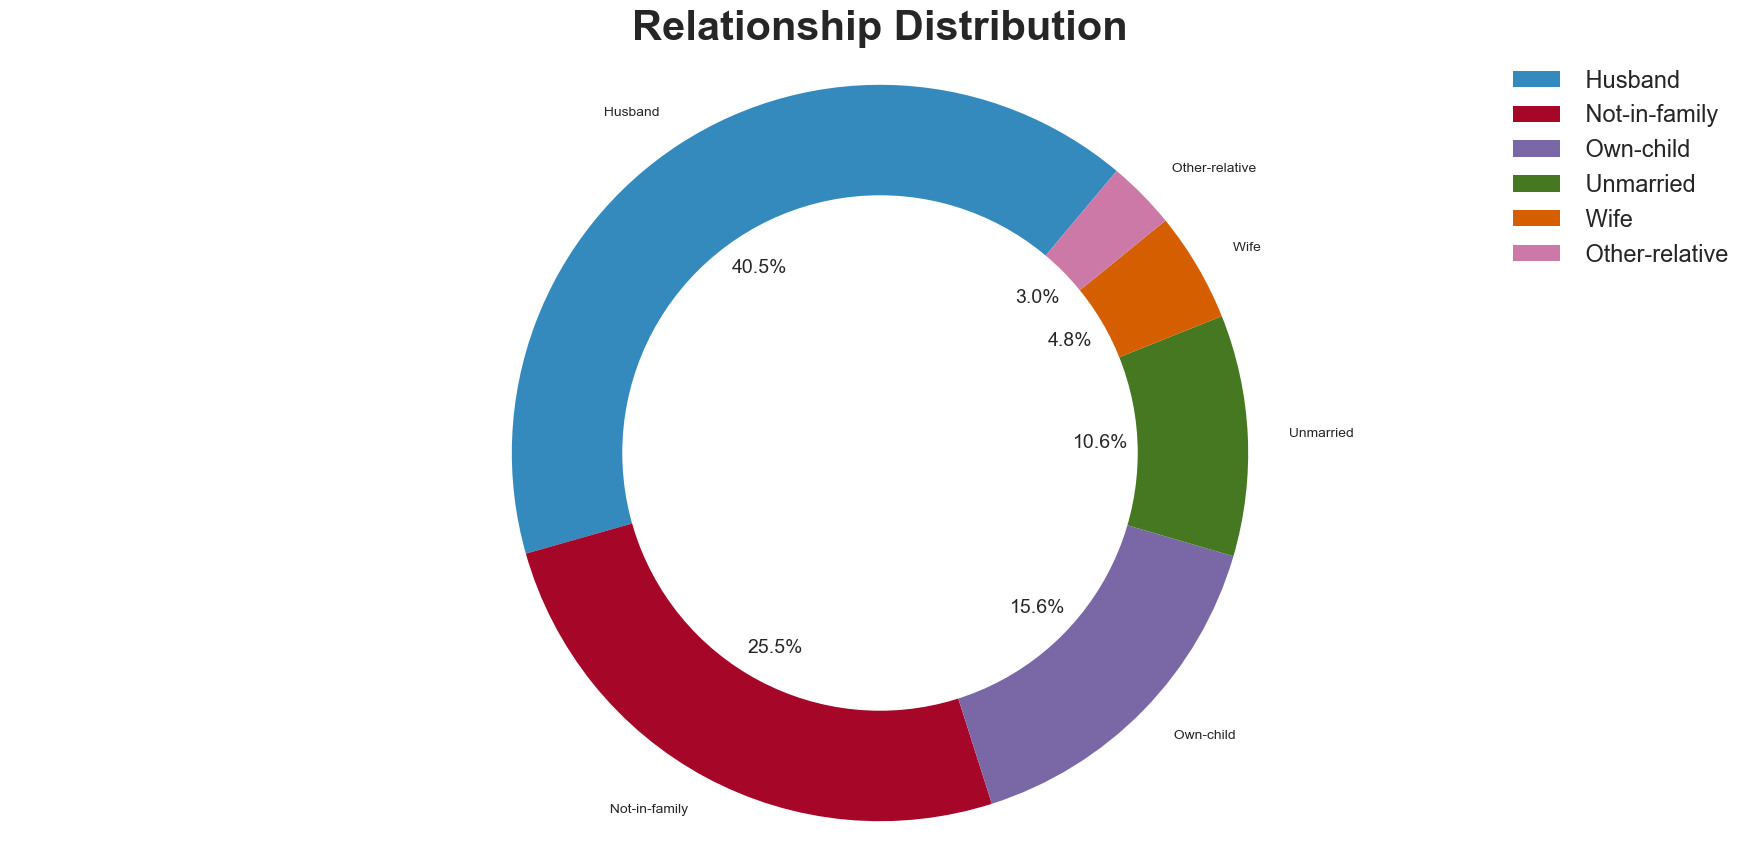

In [20]:
# Creating a donut chart for 'Relationship'
rela_ = df['Relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20,10))
plt.pie(rela_.values, labels=rela_.index,startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0,0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship Distribution', fontdict={'fontsize':30, 'fontweight':'bold'})
plt.axis('equal')
plt.legend(prop={'size':17})
plt.show()

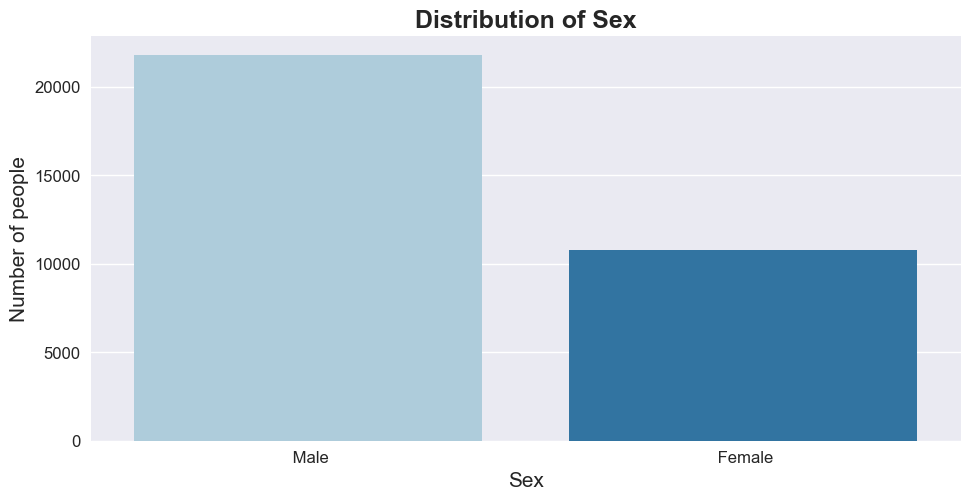

In [21]:
# Creating a barplot for 'Sex'
sex = df['Sex'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.barplot(x=sex.index, y=sex.values, palette='Paired')
plt.title('Distribution of Sex', fontdict={'fontsize':18, 'fontweight': 'bold'})
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Number of people', fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

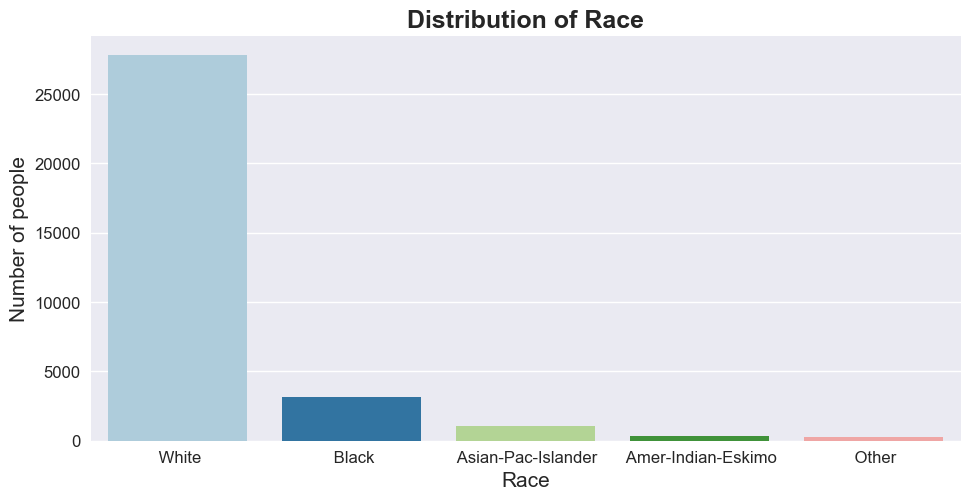

In [22]:
# Creating a barplot for 'Race'
race = df['Race'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.barplot(x=race.index, y=race.values, palette='Paired')
plt.title('Distribution of Race', fontdict={'fontsize':18, 'fontweight': 'bold'})
plt.xlabel('Race', fontsize=15)
plt.ylabel('Number of people', fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

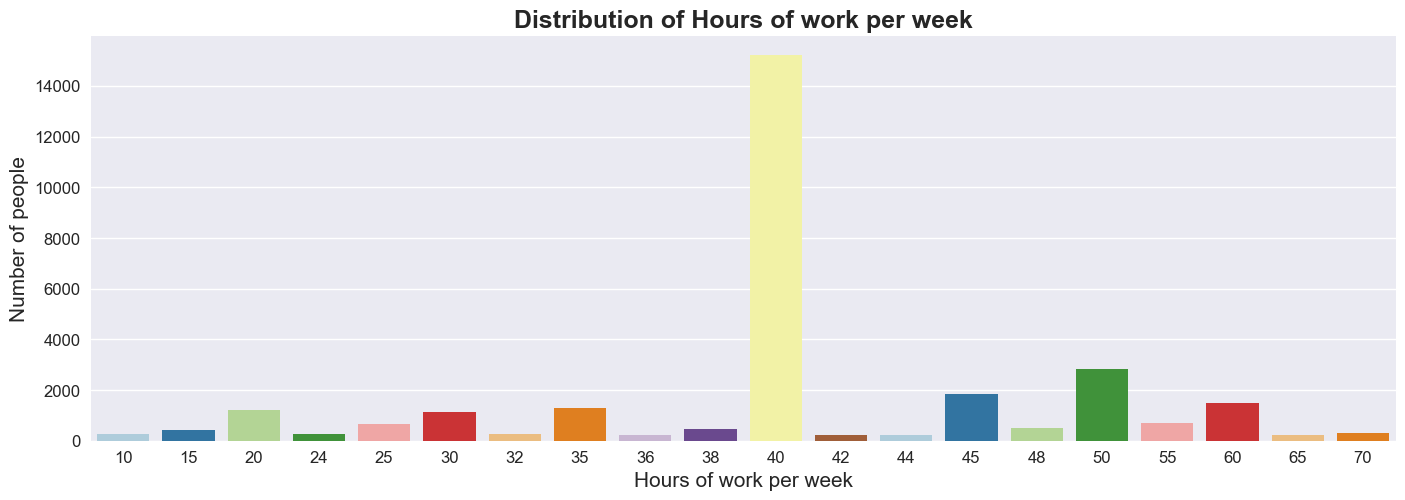

In [23]:
# Creating a barplot for 'Hours per week'
hours_p = df['Hours_per_week'].value_counts().head(20)

plt.style.use('seaborn')
plt.figure(figsize=(15,5))
sns.barplot(x=hours_p.index, y=hours_p.values, palette='Paired')
plt.title('Distribution of Hours of work per week', fontdict={'fontsize':18, 'fontweight': 'bold'})
plt.xlabel('Hours of work per week', fontsize=15)
plt.ylabel('Number of people', fontsize=15)
plt.tick_params(labelsize=12)
plt.show()

### Bivariate Analysis

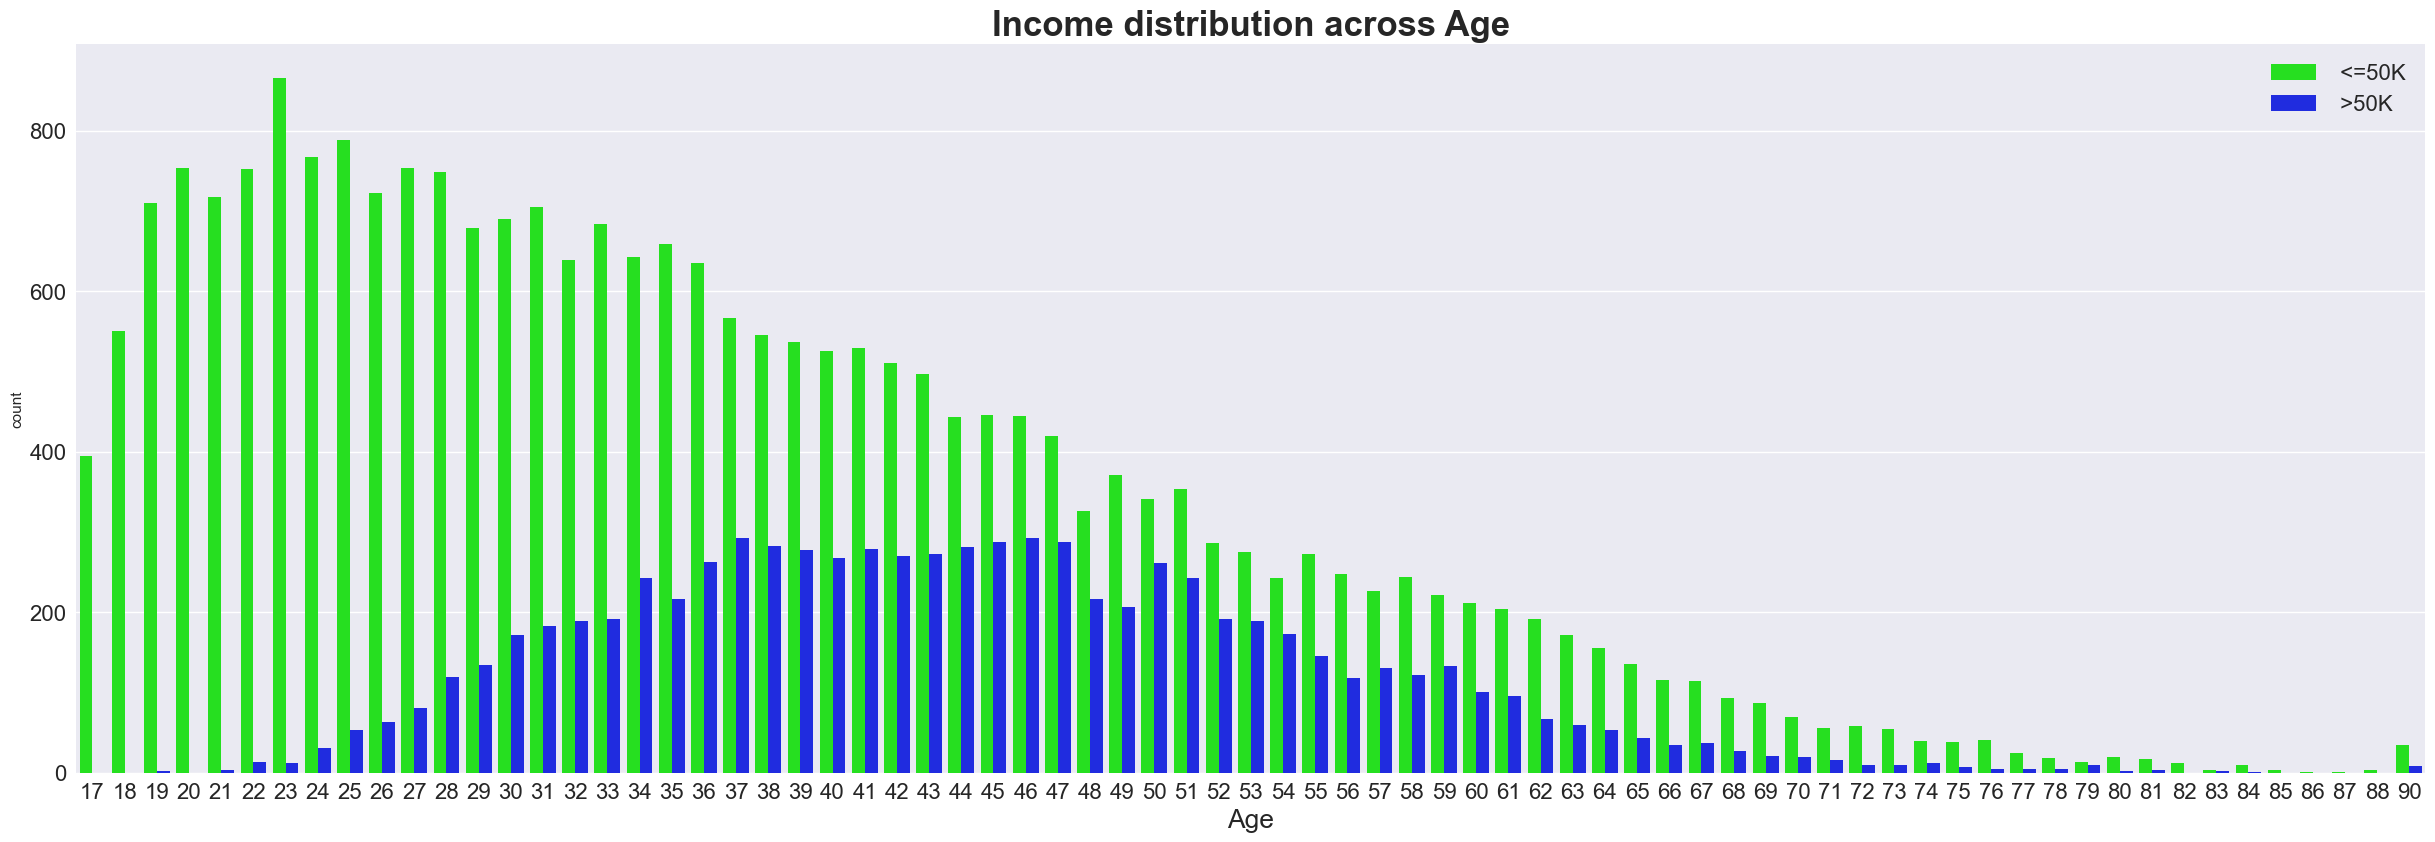

In [24]:
plt.figure(figsize=(27,9))
p = sns.countplot(x=df['Age'], hue=df['Income'], palette='hsv')
plt.title('Income distribution across Age', fontsize=25, fontweight='bold')
p.set_xlabel('Age',fontsize=19)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

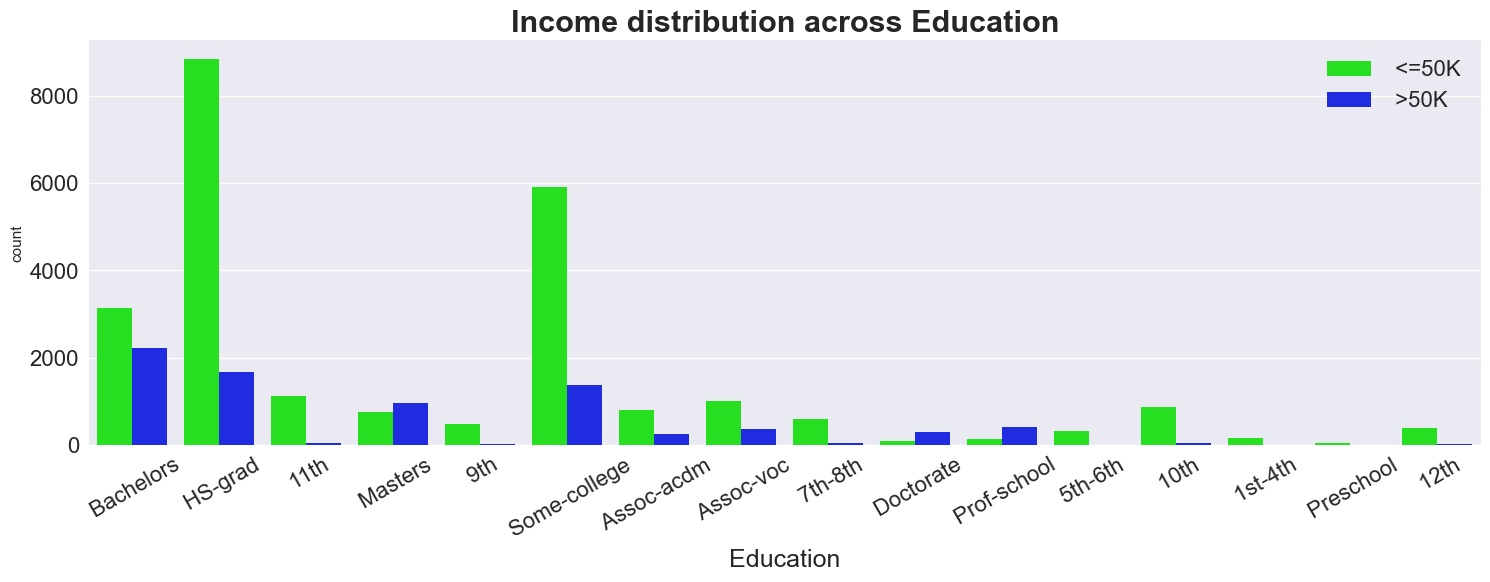

In [25]:
plt.figure(figsize=(16,5))
p = sns.countplot(x=df['Education'], hue=df['Income'], palette='hsv')
plt.title('Income distribution across Education', fontsize=22, fontweight='bold')
p.set_xlabel('Education',fontsize=18)
plt.xticks(fontsize=16, rotation=30)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

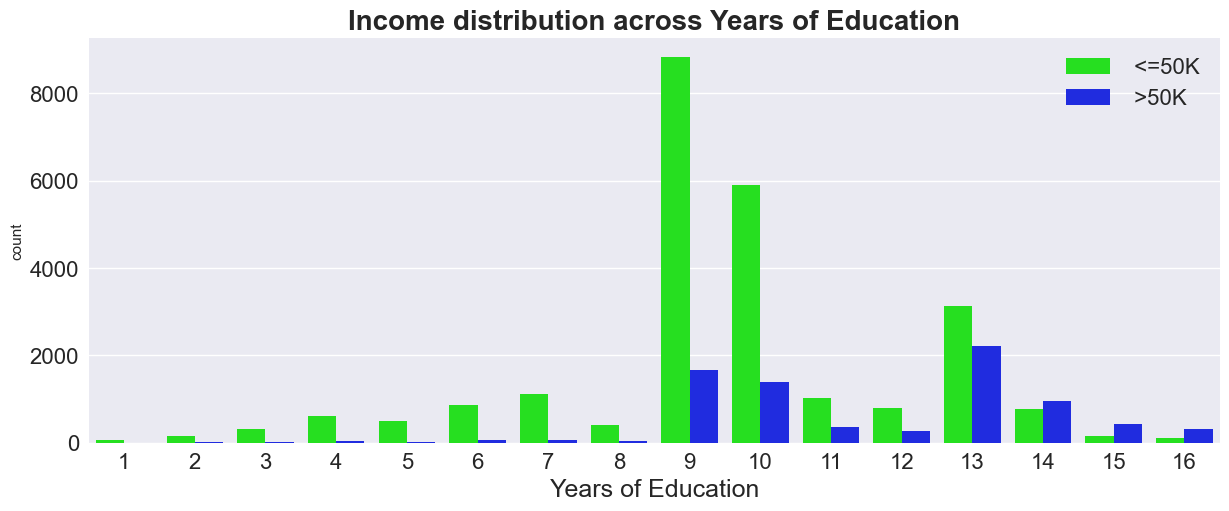

In [26]:
plt.figure(figsize=(13,5))
p = sns.countplot(x=df['Education_num'], hue=df['Income'], palette='hsv')
plt.title('Income distribution across Years of Education', fontsize=20, fontweight='bold')
p.set_xlabel('Years of Education',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

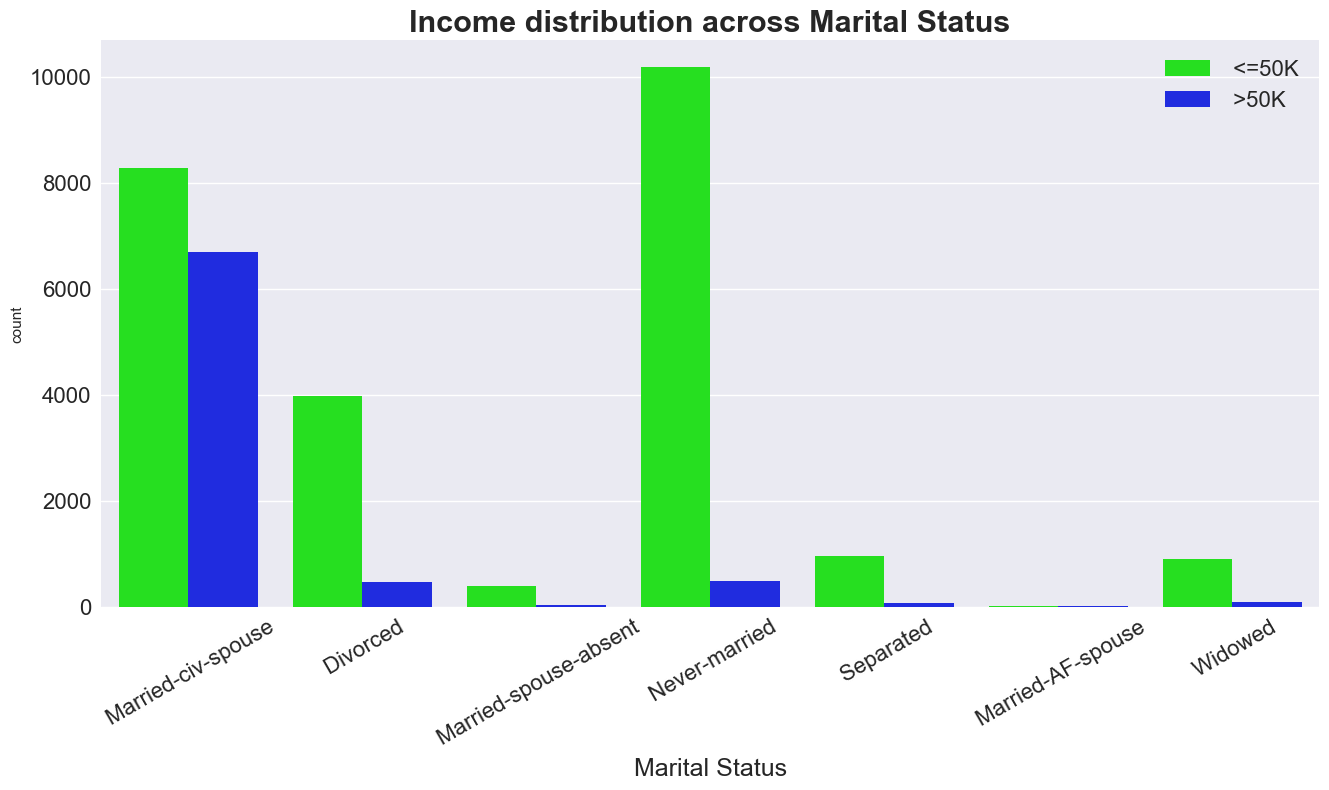

In [27]:
plt.figure(figsize=(14,7))
p = sns.countplot(x=df['Marital_status'], hue=df['Income'], palette='hsv')
plt.title('Income distribution across Marital Status', fontsize=22, fontweight='bold')
p.set_xlabel('Marital Status',fontsize=18)
plt.xticks(fontsize=16, rotation=30)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

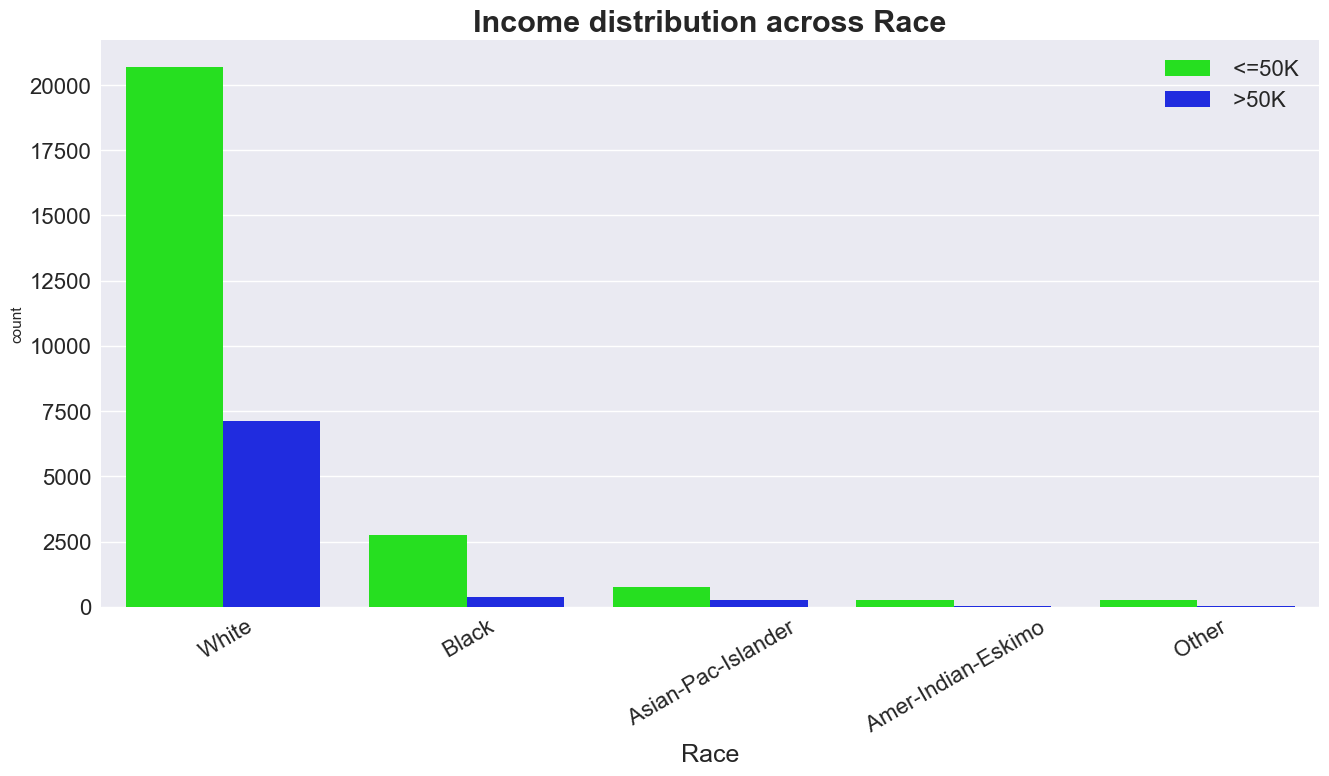

In [28]:
plt.figure(figsize=(14,7))
p = sns.countplot(x=df['Race'], hue=df['Income'], palette='hsv')
plt.title('Income distribution across Race', fontsize=22, fontweight='bold')
p.set_xlabel('Race',fontsize=18)
plt.xticks(fontsize=16, rotation=30)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

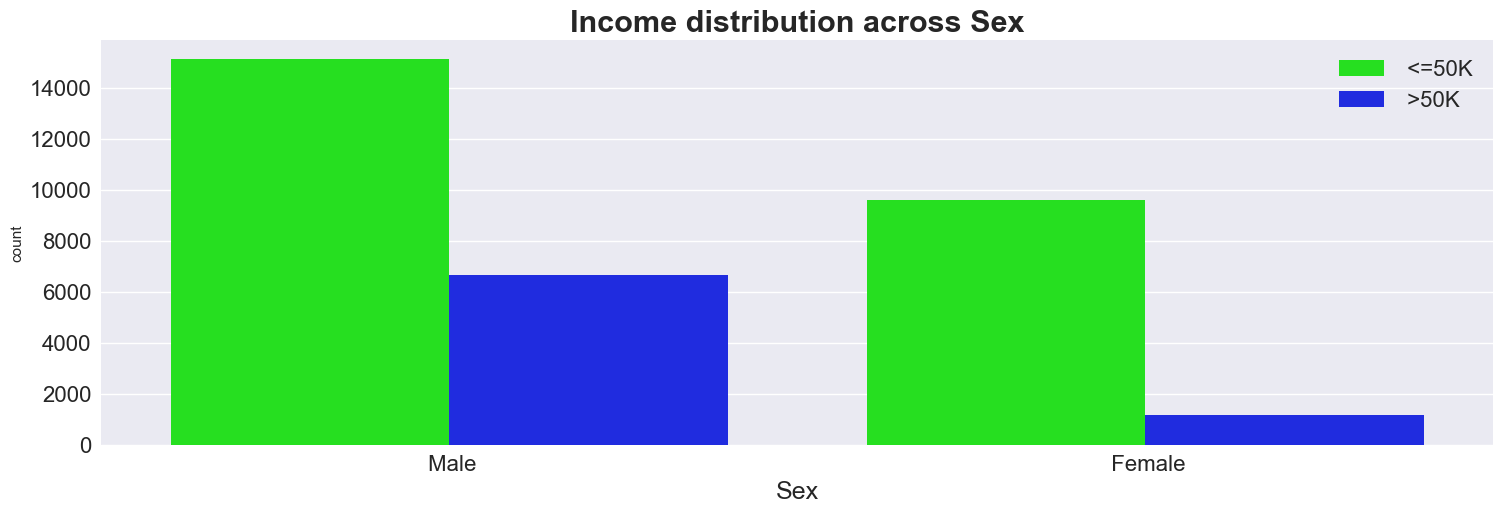

In [29]:
plt.figure(figsize=(16,5))
p = sns.countplot(x=df['Sex'], hue=df['Income'], palette='hsv')
plt.title('Income distribution across Sex', fontsize=22, fontweight='bold')
p.set_xlabel('Sex',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

### Multivariate Analysis

In [30]:
le = LabelEncoder()

In [31]:
df['Income'] = le.fit_transform(df['Income'])

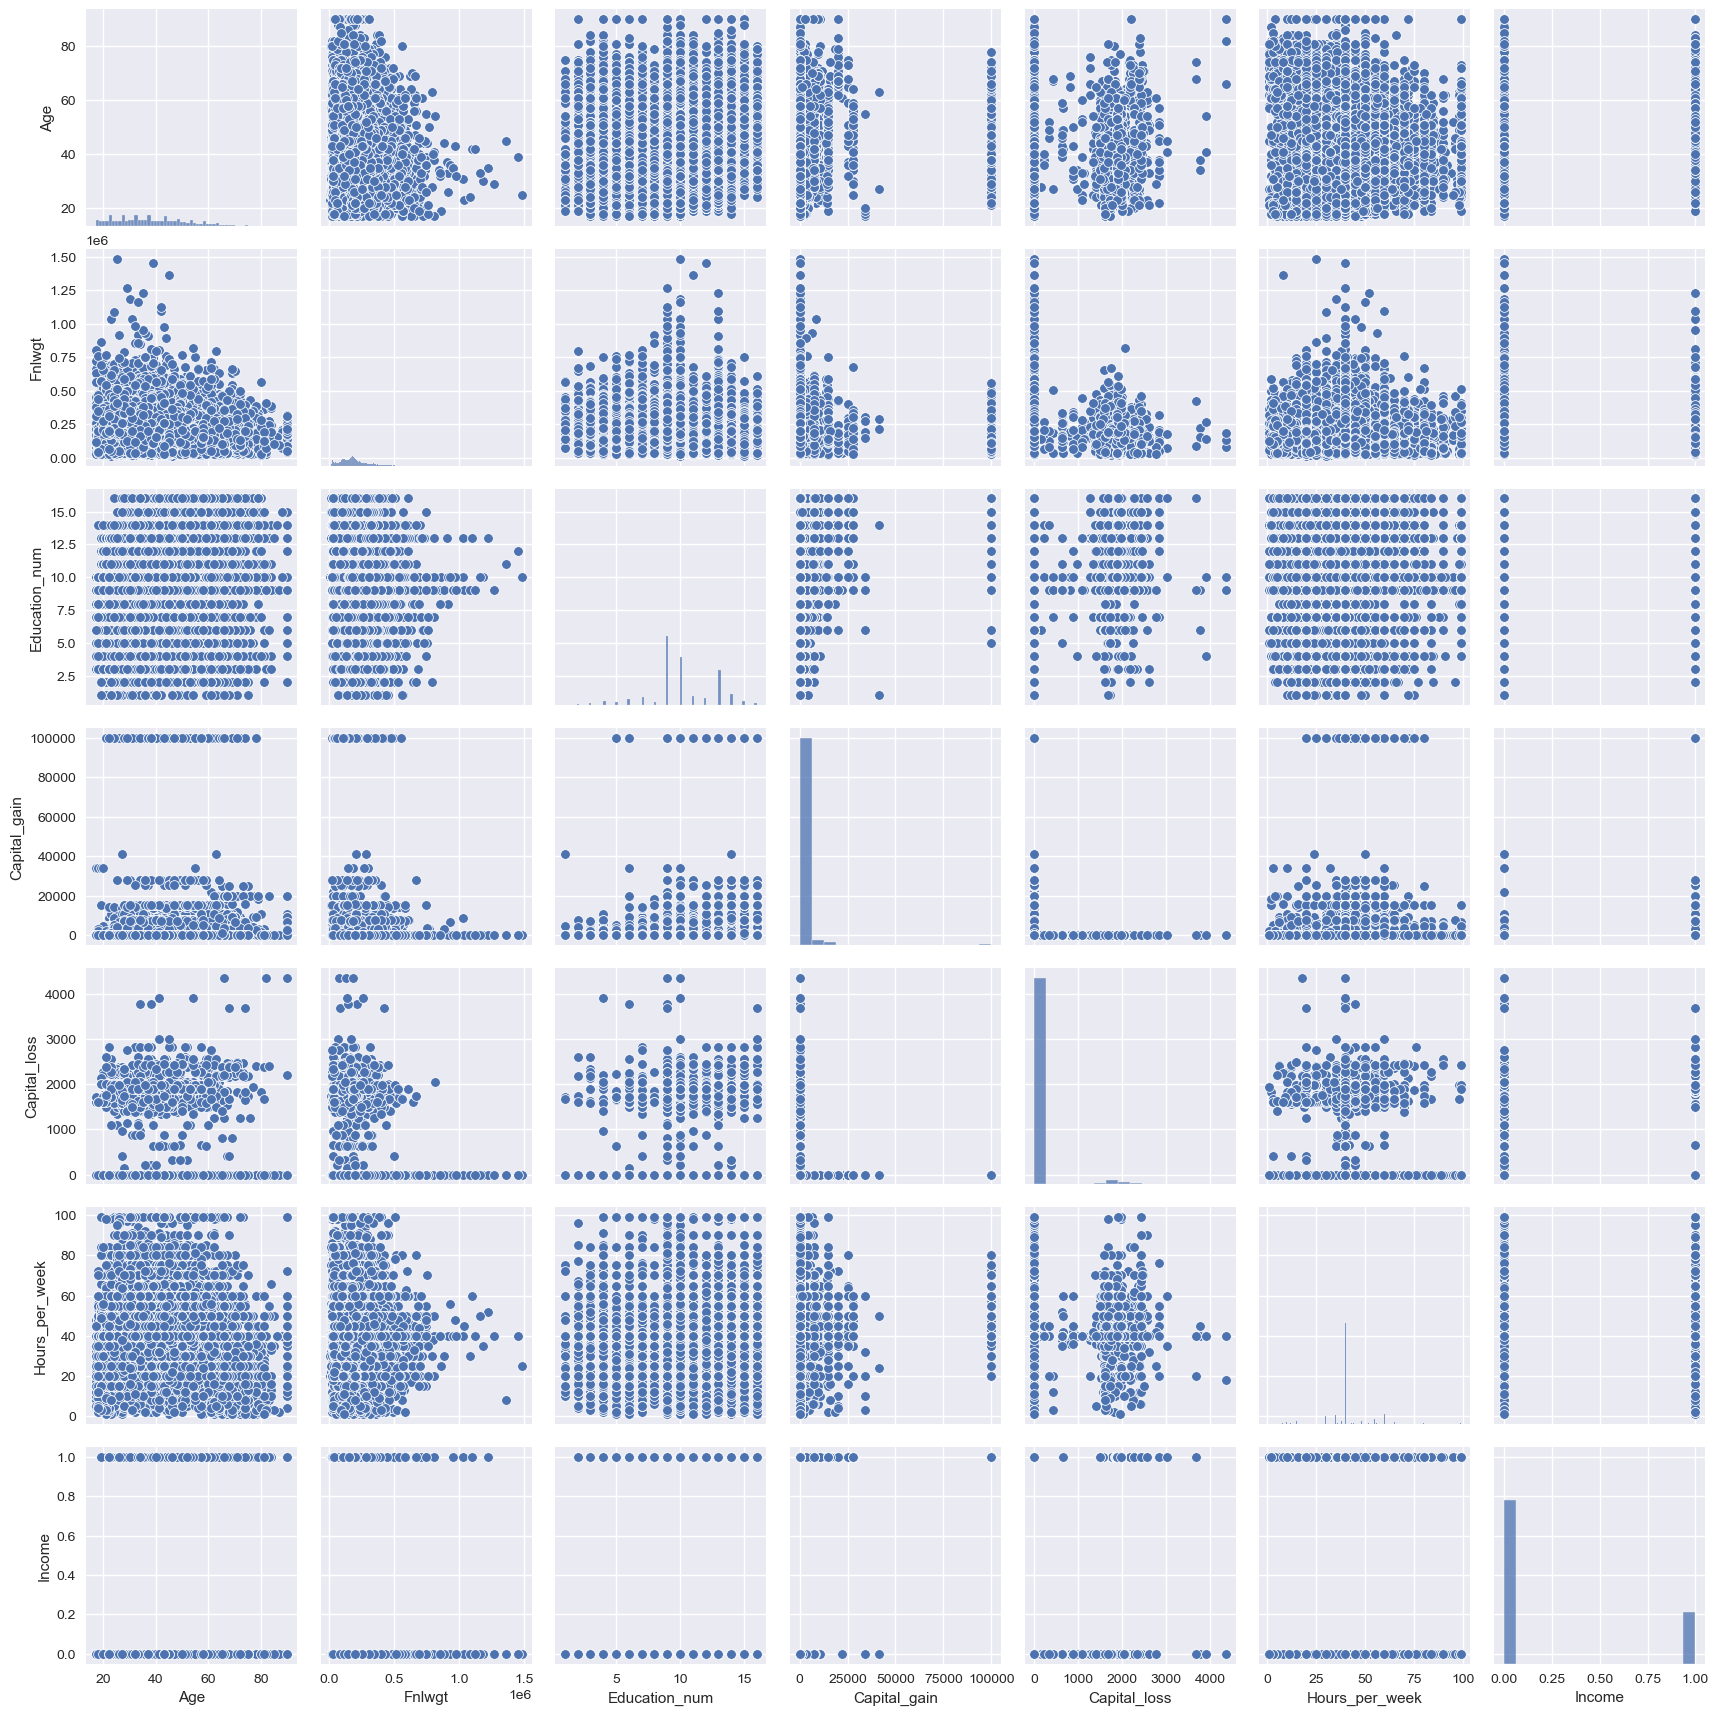

In [32]:
# Creating a pairplot of dataset
sns.pairplot(df)
plt.savefig('multi1.png')
plt.show()

# Data Preprocessing

In [34]:
df.isin([' ?']).sum()
round((df.isin(['?']).sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

Age               0.0 %
Workclass         0.0 %
Fnlwgt            0.0 %
Education         0.0 %
Education_num     0.0 %
Marital_status    0.0 %
Occupation        0.0 %
Relationship      0.0 %
Race              0.0 %
Sex               0.0 %
Capital_gain      0.0 %
Capital_loss      0.0 %
Hours_per_week    0.0 %
Native_country    0.0 %
Income            0.0 %
dtype: object

### Fixing '?' values in the dataset

In [35]:
df = df.replace('?', np.nan)

In [36]:
columns_with_nan = ['Workclass', 'Occupation', 'Native_country']

In [37]:
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

### Label Encoding

In [38]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

### Feature Selection

In [39]:
X = df.drop('Income', axis=1)
Y = df['Income']

In [40]:
selector = ExtraTreesClassifier(random_state=42)

In [41]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [42]:
feature_imp = selector.feature_importances_

In [43]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.36
1 4.45
2 16.52
3 3.56
4 8.98
5 7.33
6 7.48
7 9.46
8 1.45
9 2.7
10 8.84
11 2.77
12 9.36
13 1.74


In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [45]:
X = X.drop(['Workclass', 'Education', 'Race', 'Sex', 'Capital_loss', 'Native_country'], axis=1)

### Feature Scaling

In [46]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### Fixing imbalanced dataset using Oversampling

In [47]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

Income
0    75.92 %
1    24.08 %
Name: proportion, dtype: object

In [48]:
ros = RandomOverSampler(random_state=42)

In [49]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [50]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [51]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

Income
0    50.0 %
1    50.0 %
Name: proportion, dtype: object

### Creating a train test split

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [53]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39550, 8)
X_test shape: (9888, 8)
Y_train shape: (39550,)
Y_test shape: (9888,)


# Data Modelling

### Logistic Regression

In [54]:
log_reg = LogisticRegression(random_state=42)

In [55]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [56]:
Y_pred_log_reg = log_reg.predict(X_test)

### KNN Classifier

In [57]:
knn = KNeighborsClassifier()

In [58]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [59]:
Y_pred_knn = knn.predict(X_test)

### Support Vector Classifier

In [60]:
svc = SVC(random_state=42)

In [61]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [62]:
Y_pred_svc = svc.predict(X_test)

### Naive Bayes Classifier

In [63]:
nb = GaussianNB()

In [64]:
nb.fit(X_train, Y_train)

GaussianNB()

In [65]:
Y_pred_nb = nb.predict(X_test)

### Decision Tree Classifier

In [66]:
dec_tree = DecisionTreeClassifier(random_state=42)

In [67]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [68]:
Y_pred_dec_tree = dec_tree.predict(X_test)

### Random Forest Classifier

In [69]:
ran_for = RandomForestClassifier(random_state=42)

In [70]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [71]:
Y_pred_ran_for = ran_for.predict(X_test)

### XGB Classifier

In [72]:
xgb = XGBClassifier()

In [73]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [74]:
Y_pred_xgb = xgb.predict(X_test)

# Model Evaluation

In [75]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 76.05
F1 score: 76.07


In [76]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 83.61
F1 score: 84.63


In [77]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 81.99
F1 score: 83.09


In [78]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 66.26
F1 score: 52.03


In [79]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 91.28
F1 score: 91.75


In [80]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.57
F1 score: 92.93


In [81]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb) * 100, 2))

XGB Classifier:
Accuracy score: 86.15
F1 score: 86.73


# Hyperparameter Tuning

In [84]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [85]:
param_dist = {'n_estimators': n_estimators, 'max_depth': max_depth,}

In [86]:
rf_tuned = RandomForestClassifier(random_state=42)

In [88]:
rf_cv = RandomizedSearchCV(estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [89]:
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [90]:
rf_cv.best_score_

0.9123135271807838

In [91]:
rf_cv.best_params_

{'n_estimators': 134, 'max_depth': 142}

In [92]:
rf_best = RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [93]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [94]:
Y_pred_rf_best = rf_best.predict(X_test)

In [96]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.59
F1 score: 92.95


In [97]:
cm = confusion_matrix(Y_test, Y_pred_rf_best)

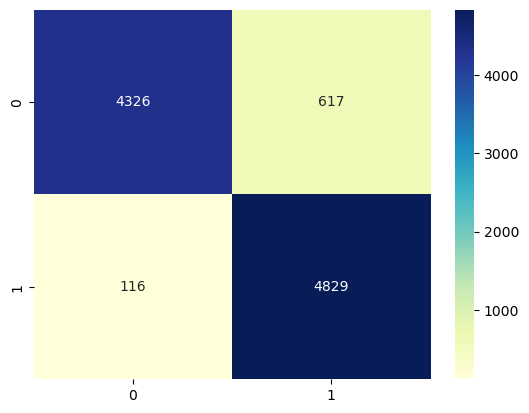

In [99]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [100]:
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4943
           1       0.89      0.98      0.93      4945

    accuracy                           0.93      9888
   macro avg       0.93      0.93      0.93      9888
weighted avg       0.93      0.93      0.93      9888



In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier.

A hyperparameter tuned random forest classifier gives the highest accuracy score of 92.59 and f1 score of 92.95.